## Imports

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
%cd ../src/
import get_stats
%cd ../notebooks/

/home/nt/Desktop/JHU/Time Series Analysis/ckt-time-series-analysis/src
/home/nt/Desktop/JHU/Time Series Analysis/ckt-time-series-analysis/notebooks


## Get data

For this project, we'd like to work with a [Consumer Sentiment](https://www.quandl.com/data/UMICH/SOC1-University-of-Michigan-Consumer-Survey-Index-of-Consumer-Sentiment) dataset.

In [3]:
%cd ../data/
cons_sent = pd.read_pickle("cons_sent.pickle")
%cd ../notebooks/

/home/nt/Desktop/JHU/Time Series Analysis/ckt-time-series-analysis/data
/home/nt/Desktop/JHU/Time Series Analysis/ckt-time-series-analysis/notebooks


## Explore data

In [4]:
cons_sent.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 593 entries, 1952-11-30 to 2019-09-30
Data columns (total 1 columns):
Index    593 non-null float64
dtypes: float64(1)
memory usage: 9.3 KB


In [5]:
cons_sent.describe()

,Index
count,593.000000
mean,86.611130
std,12.330911
min,51.700000
25%,77.600000
50%,90.200000
75%,95.300000
max,112.000000


In [6]:
cons_sent.head()

,Index
Date,
1952-11-30,86.2
1953-02-28,90.7
1953-08-31,80.8
1953-11-30,80.7
1954-02-28,82.0


In [7]:
cons_sent.tail()

,Index
Date,
2019-05-31,100.0
2019-06-30,98.2
2019-07-31,98.4
2019-08-31,89.8
2019-09-30,93.2


In [8]:
cons_sent.groupby(pd.Grouper(freq="A")).count()

,Index
Date,
1952-12-31,1
1953-12-31,3
1954-12-31,3
1955-12-31,3
1956-12-31,3
1957-12-31,2
1958-12-31,3
1959-12-31,2
1960-12-31,4


In [9]:
(cons_sent.groupby(pd.Grouper(freq="A")).count() != 12).sum()

Index    27
dtype: int64

The first 26 years (1952 to 1977) don't have monthly frequency.<br>
Also, we only have data for the first 9 months of 2019 (note: this dataset was retrieved on Nov 2, 2019).

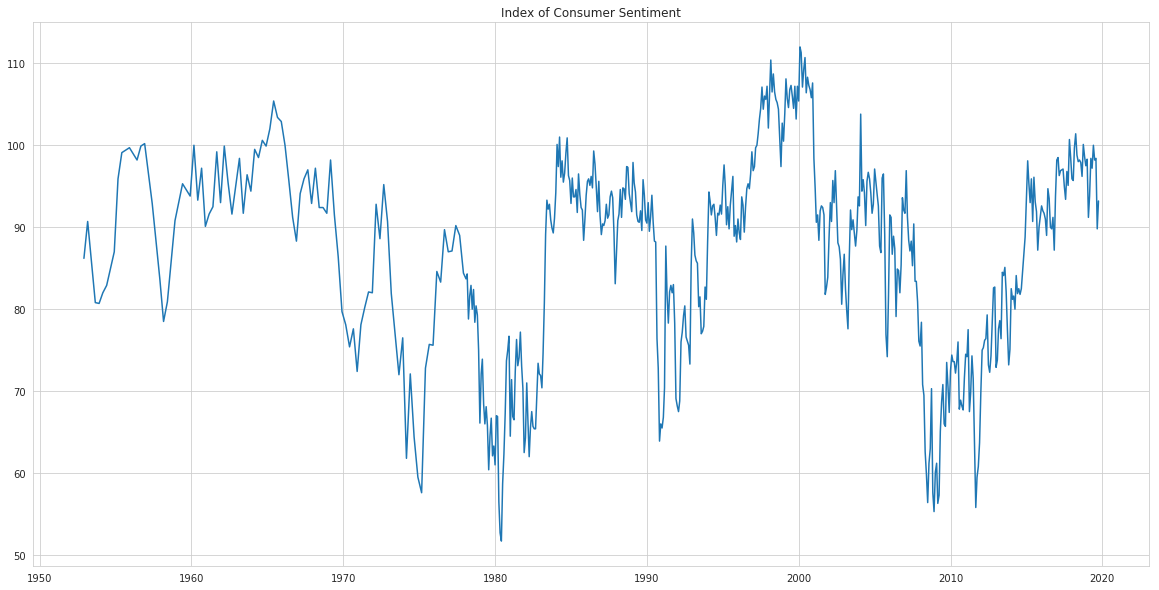

In [10]:
get_stats.Stats.plot_time_series(cons_sent, "Index of Consumer Sentiment")

## Dataset to use

Given our analysis so far, there are a few ways in which we can go about this dataset: as is, upsampling, and "real" monthly, etc.

### As is

cons_sent

### Upsampling

We apply forward filling.

In [11]:
cons_sent_up = cons_sent.resample("M").ffill()

In [12]:
cons_sent_up.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 803 entries, 1952-11-30 to 2019-09-30
Freq: M
Data columns (total 1 columns):
Index    803 non-null float64
dtypes: float64(1)
memory usage: 12.5 KB


In [13]:
cons_sent_up.head()

,Index
Date,
1952-11-30,86.2
1952-12-31,86.2
1953-01-31,86.2
1953-02-28,90.7
1953-03-31,90.7


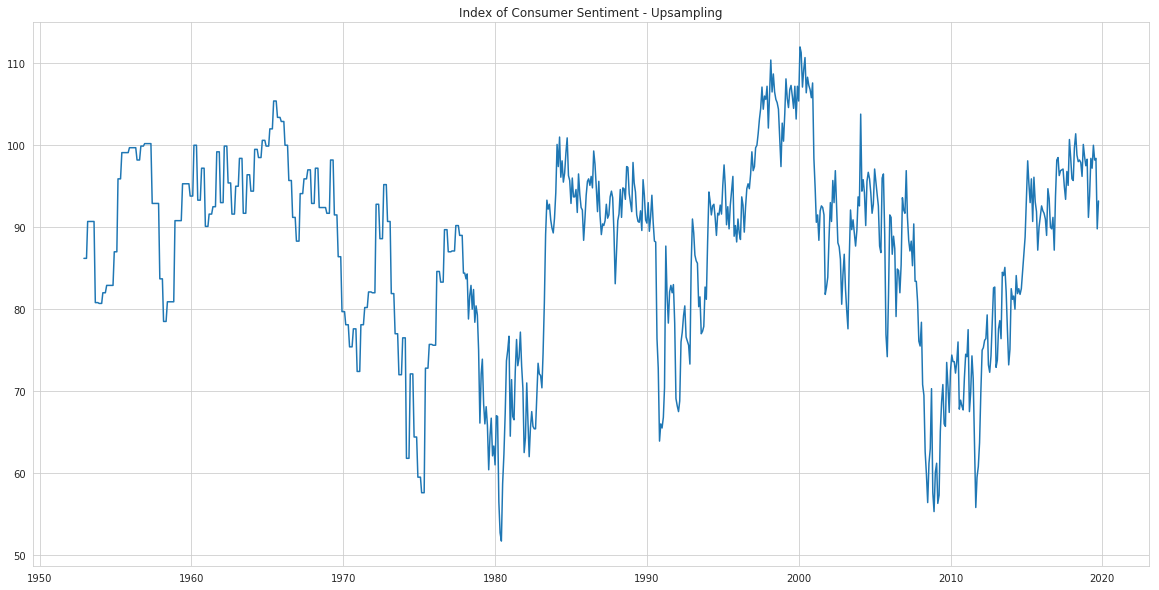

In [14]:
get_stats.Stats.plot_time_series(cons_sent_up, "Index of Consumer Sentiment - Upsampling")

### "Real" monthly

We only keep the years with "real" monthly frequency. This means that we only care about the years with monthly frequency straight from the original dataset and not from our own aggregation procedure. The years are 1978 onwards.

In [15]:
cons_sent_monthly = cons_sent["1978":]

In [16]:
cons_sent_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 1978-01-31 to 2019-09-30
Data columns (total 1 columns):
Index    501 non-null float64
dtypes: float64(1)
memory usage: 7.8 KB


In [17]:
cons_sent_monthly.head()

,Index
Date,
1978-01-31,83.7
1978-02-28,84.3
1978-03-31,78.8
1978-04-30,81.6
1978-05-31,82.9


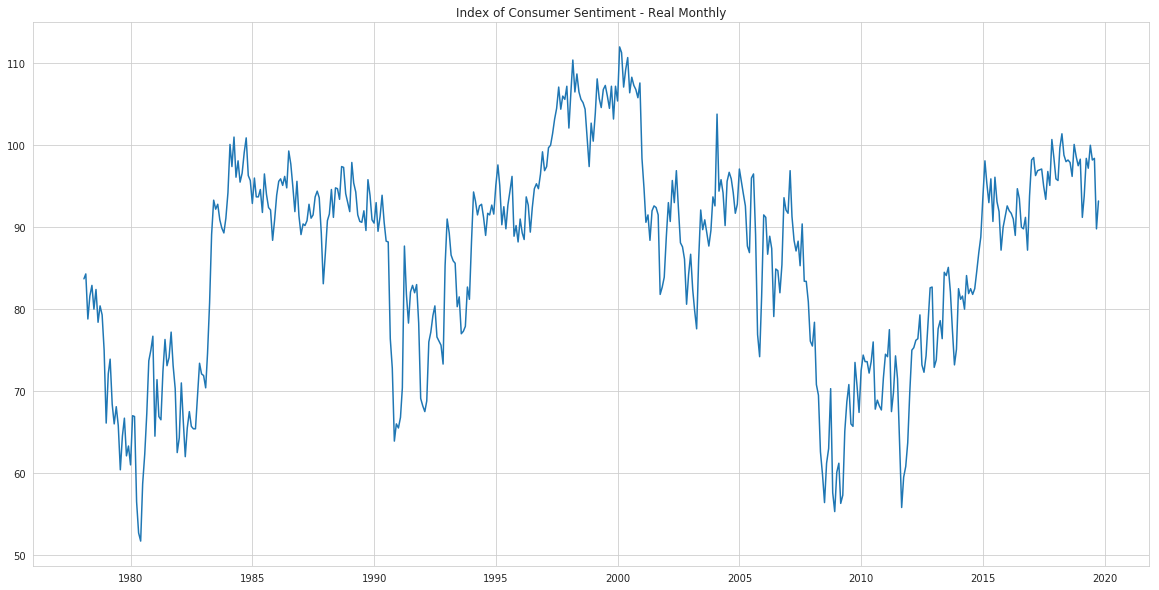

In [18]:
get_stats.Stats.plot_time_series(cons_sent_monthly, "Index of Consumer Sentiment - Real Monthly")

--------------------------------------------------

For this project, we decide to go with the "real" monthly dataset as it still leaves us with plenty data points with which to work. Now, let us rename it to 'df' for the sake of convenience.

In [19]:
df = cons_sent_monthly

------------------------------------------------

## Has outliers?

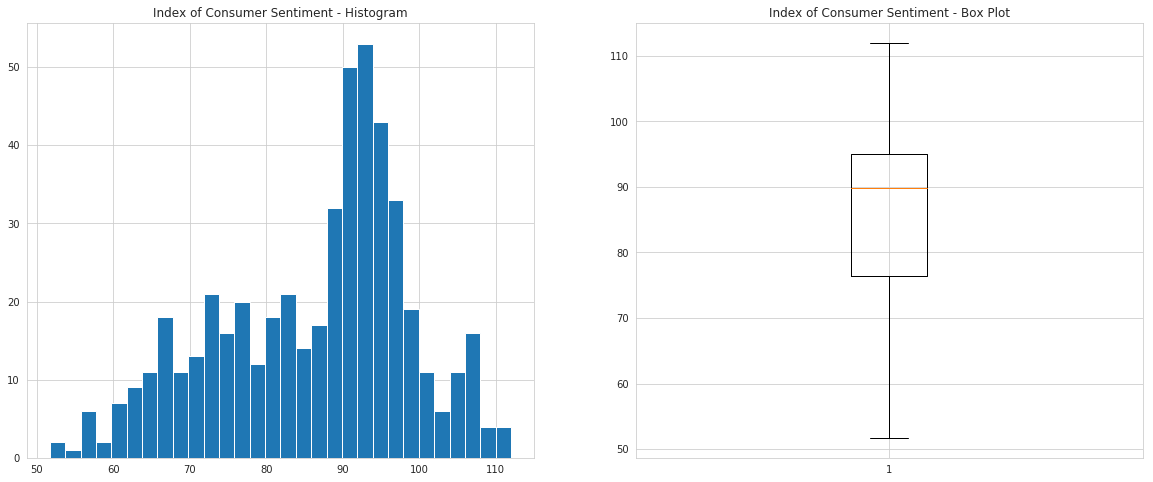

In [20]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.hist(df.values, bins=30)
plt.title("Index of Consumer Sentiment - Histogram")
plt.subplot(122)
plt.boxplot(df.values, showfliers=True)
plt.title("Index of Consumer Sentiment - Box Plot")
plt.show()

The distribution of values has a high skewness to the left side (negative skewness). However, we don’t see any outliers.

## Is stationary?

In [21]:
get_stats.Stats.adfuller(df)

ADF Statistic: -2.377887
p-value:       0.148075
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570
Used Lag:      5


Our statistic value of -2.377887 is greater than all of the values presented.<br>
We fail to reject the null hypothesis.<br>
Failing to reject the null hypothesis means that the time series is non-stationary and does have time-dependent structure.

In [22]:
get_stats.Stats.adfuller(df, maxlag=0)

ADF Statistic: -3.451318
p-value:       0.009329
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
Used Lag:      0


In [23]:
get_stats.Stats.adfuller(df, maxlag=1)

ADF Statistic: -3.451318
p-value:       0.009329
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
Used Lag:      0


In [24]:
get_stats.Stats.adfuller(df, maxlag=2)

ADF Statistic: -3.020307
p-value:       0.033041
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570
Used Lag:      2


In [25]:
get_stats.Stats.adfuller(df, maxlag=3)

ADF Statistic: -3.020307
p-value:       0.033041
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570
Used Lag:      2


In [26]:
get_stats.Stats.adfuller(df, maxlag=4)

ADF Statistic: -3.451318
p-value:       0.009329
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
Used Lag:      0


We find that up to an $AR(5)$ ( the lag convention is pythonic, i.e. $lag = 0$ means an $AR(1)$ ), we can typically reject the null hypotheses with the p-values being less than 5% (relative to the ADF t-distribution) and in some cases less than 1%. However, when we let the model pick, we can no longer rule out the presence of a unit root with a coefficient p-value of about 15%. While this is potentially worrying, we note that this is not uncommon in economic series and the fact that most of our tests allowed us to reject the presence of a unit root, the data is likely close to, if not exactly, being stationary. As such we cannot a priori identify an obvious transformation and we proceed with caution without one.

## Seasonal decomposition

There is no reason to believe that the type of seasonal component is multiplicative (instead of additive). However, it does not hurt to test it out.

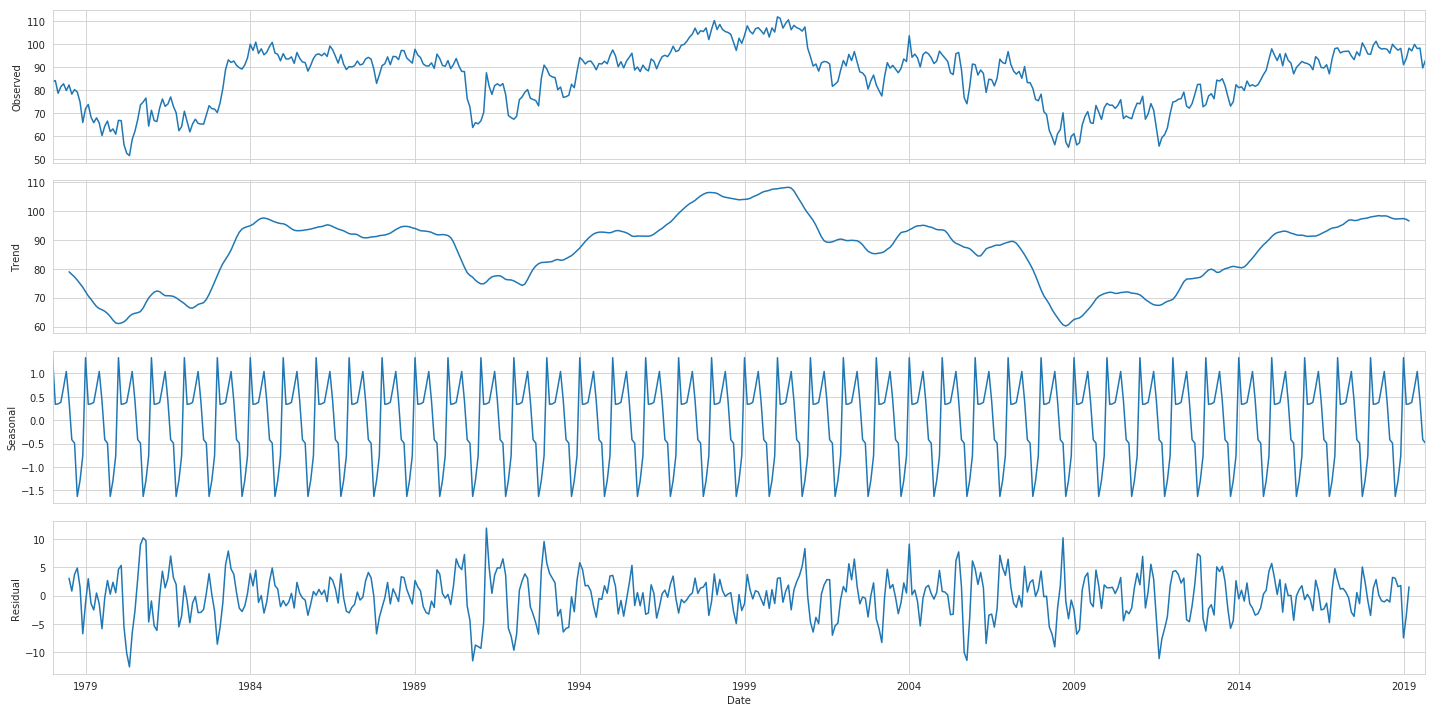

In [27]:
get_stats.Stats.seasonal_decompose(df)

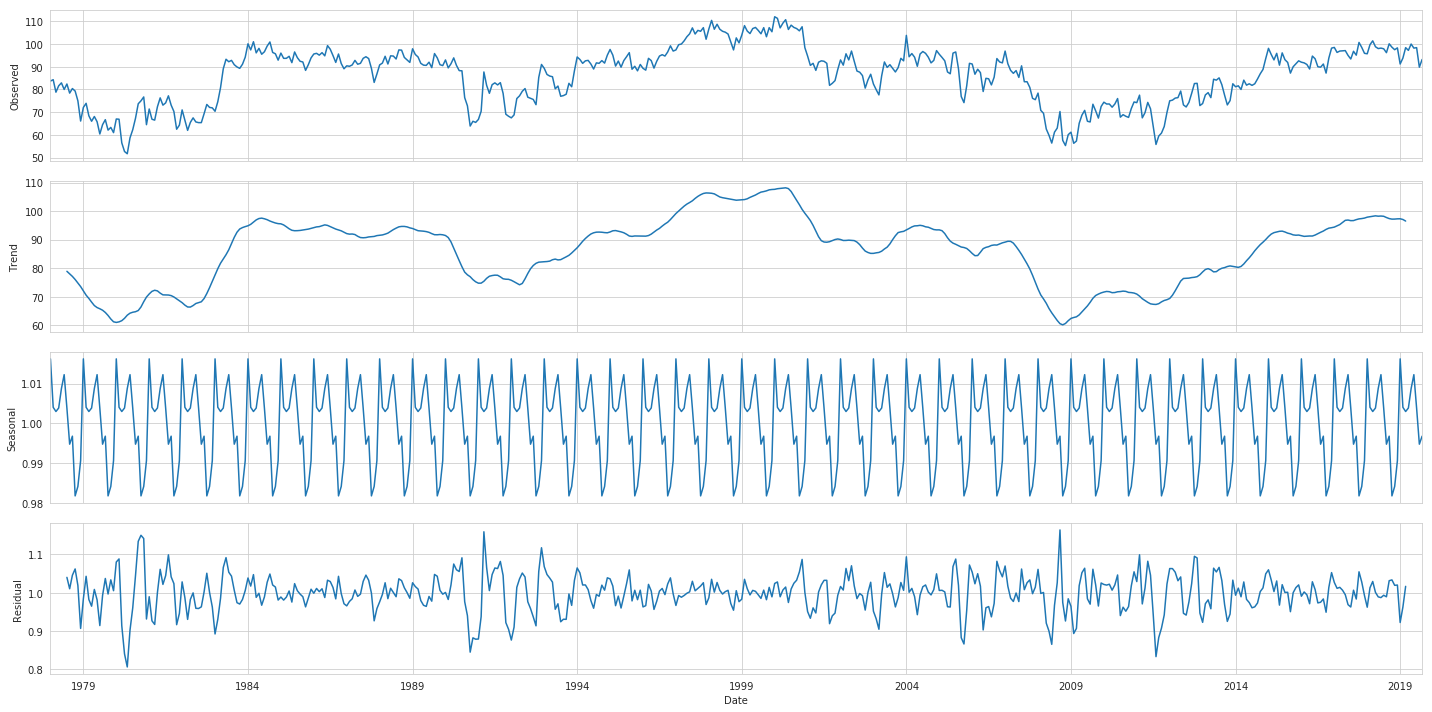

In [28]:
get_stats.Stats.seasonal_decompose(df, model='multiplicative')

The two models give very similar results.

----------------------------------------

Trend - The trend goes down at every recession (1980, 1981–1982, early 1990s, early 2000s, and Great Recession). Otherwise, the trend either stays flat or goes up.

Seasonality - Overall, people tend to spend their disposable income during the holiday season more than ever. This explains the highly steep line going into the new year. A slowdown occurs right after that until folks start to prepare for their summer vacation. Then comes a long saving period for another holiday season!

------------------------------------

## Autocorrelation (ACF) and Partial Autocorrelation (PACF)

### ACF

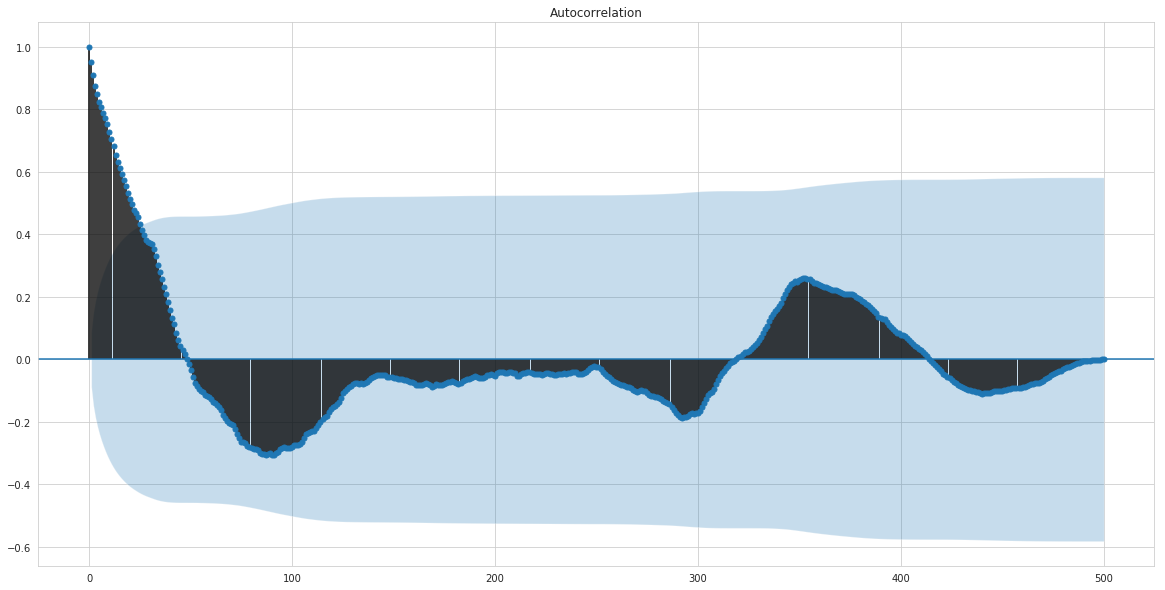

In [29]:
get_stats.Stats.plot_acf(df)

We limit the number of lags to 40 to make the plot easier to read.

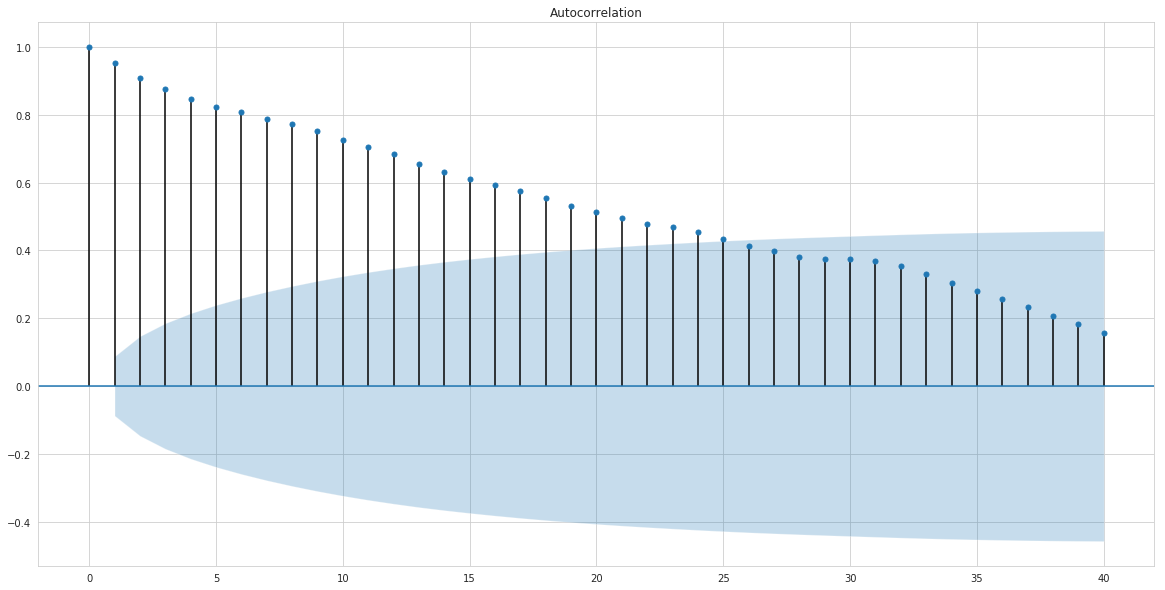

In [30]:
get_stats.Stats.plot_acf(df, lags=40)

The ACF is strong to a lag of $p$ and the inertia of that relationship carries on to subsequent lag values, trailing off at some point as the effect is weakened.<br>
This plot suggests that $p \leq 26$.

### PACF

We plot a partial autocorrelation function for the first 40 lags.

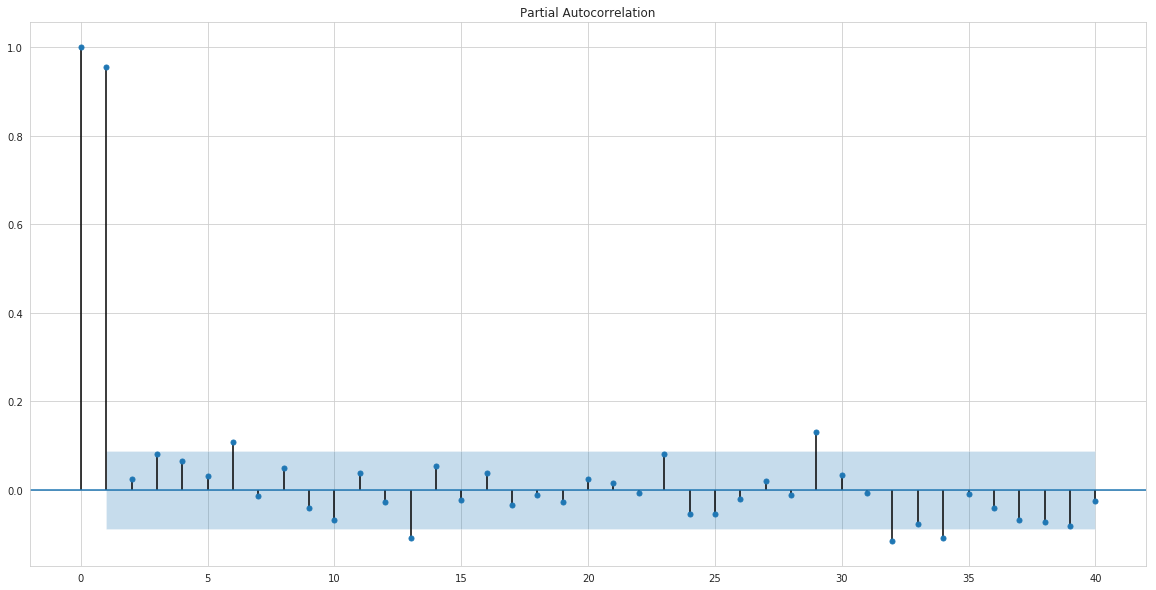

In [31]:
get_stats.Stats.plot_pacf(df, lags=40)

The PACF describes the direct relationship between an observation and its lag. This suggests that there would be no correlation for lag values beyond $p$.

-------------------------------------------------

This looks like the expectation of the ACF and PACF plots for an $AR(2)$ process.

--------------------------------------

## Fit models to the dataset

We will perform six-month forecasts.

We perform demean for better visualization:

In [32]:
df_dm = get_stats.Stats.demean(df)

### Autoregressive Model ( $AR(p)$ )

As mentioned above, we proceed with caution without a transformation to our data.

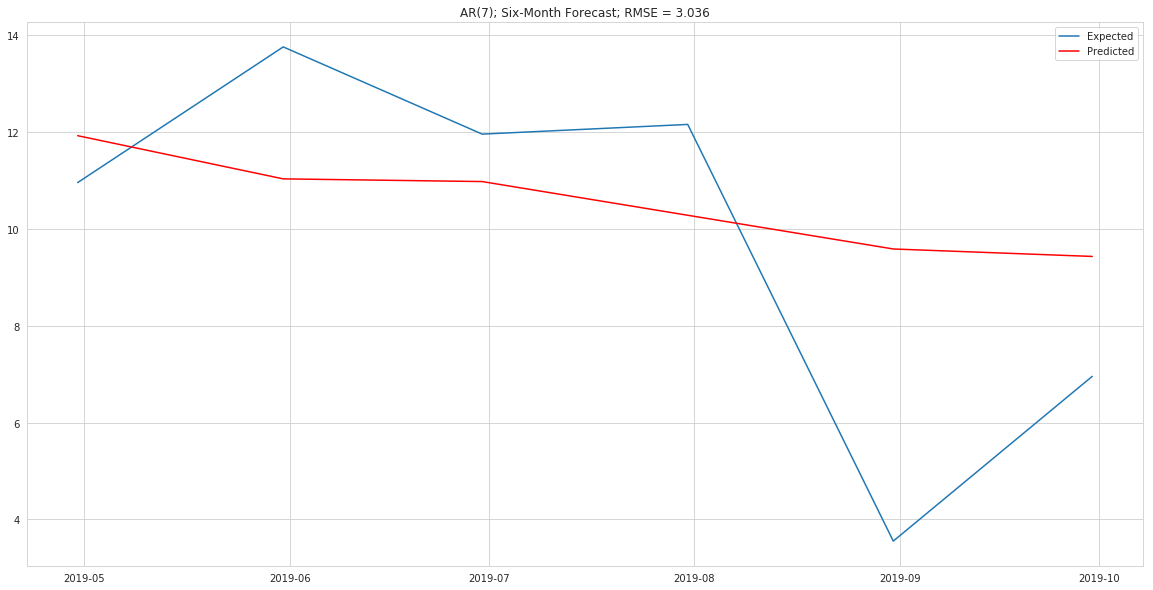

In [33]:
get_stats.Stats.AR_model(df_dm)

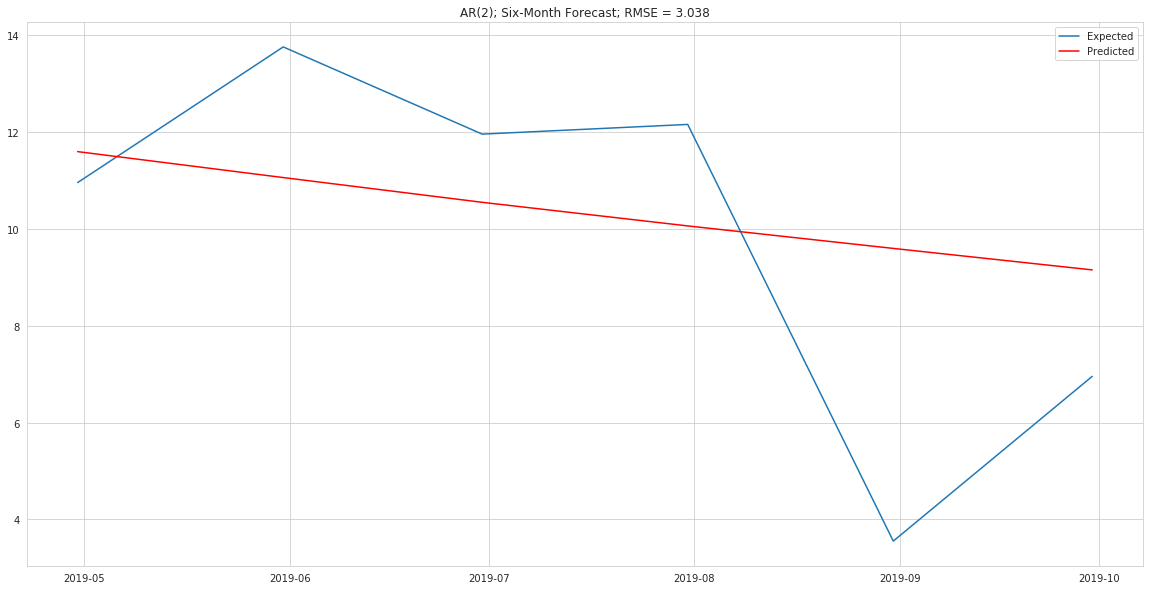

In [34]:
get_stats.Stats.AR_model(df_dm, maxlag=1)

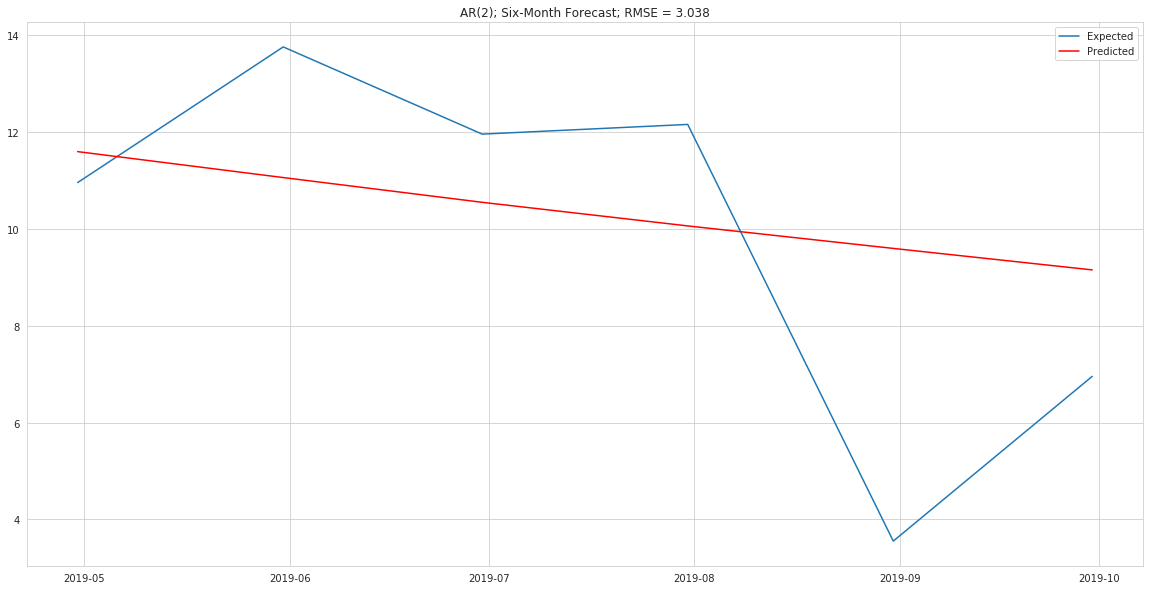

In [35]:
get_stats.Stats.AR_model(df_dm, maxlag=2)

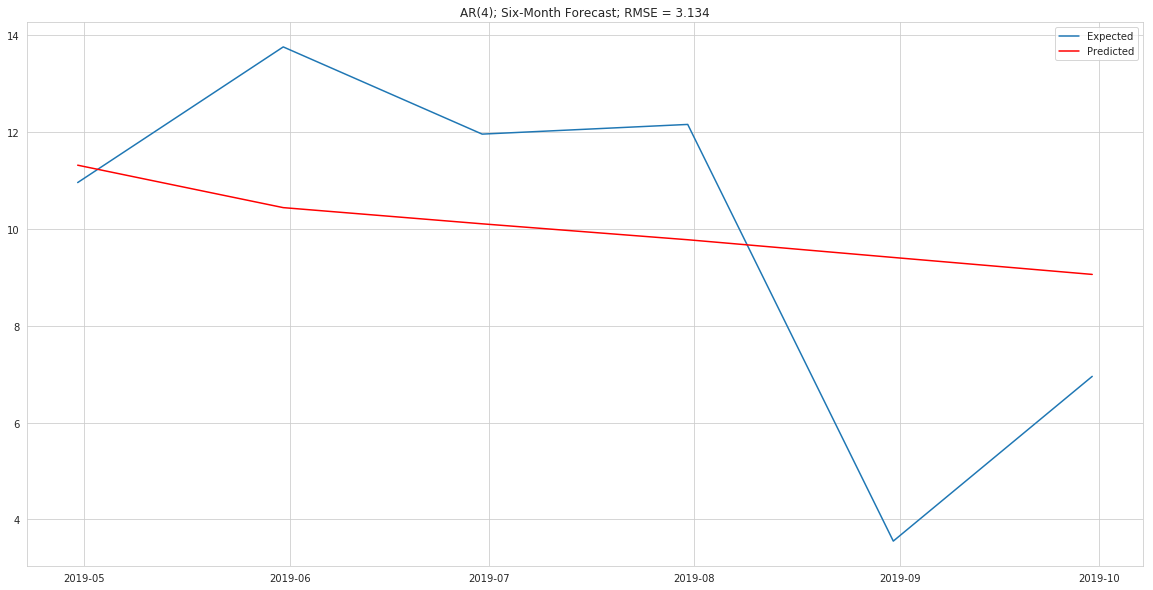

In [36]:
get_stats.Stats.AR_model(df_dm, maxlag=3)

As expected, $AR(2)$ does a pretty decent job. $AR(7)$, however, outperforms $AR(2)$ by a tiny bit.

### Autoregressive Moving Average Model ( $ARMA(p,q)$ )

   ARMA(p,q) Model      RMSE
0        ARMA(0,1)  9.803084
1        ARMA(0,2)  8.977894
2        ARMA(1,0)  3.014798
3        ARMA(1,1)  3.030535
4        ARMA(1,2)  3.135803
5        ARMA(2,0)  3.027236
6        ARMA(2,1)  3.009100
7        ARMA(2,2)  3.153275
8        ARMA(3,0)  3.119100
9        ARMA(3,1)  3.146313
10       ARMA(3,2)  3.641813
11       ARMA(4,0)  3.158987
12       ARMA(4,1)  3.138147
13       ARMA(4,2)  3.161254
14       ARMA(5,0)  3.124244
15       ARMA(5,1)  3.178209
16       ARMA(5,2)  3.182186
17       ARMA(6,0)  3.007952
18       ARMA(6,1)  3.042057
19       ARMA(6,2)  3.071242
20       ARMA(7,0)  3.000726
21       ARMA(7,1)  3.026526
22       ARMA(7,2)  3.052310
23       ARMA(8,0)  3.153070
24       ARMA(8,1)  3.144008
25       ARMA(8,2)  2.942152
26       ARMA(9,0)  3.080581
27       ARMA(9,1)  3.029513
28       ARMA(9,2)  2.933863
29      ARMA(10,0)  3.042380
30      ARMA(10,1)  3.053928
31      ARMA(10,2)  3.273669


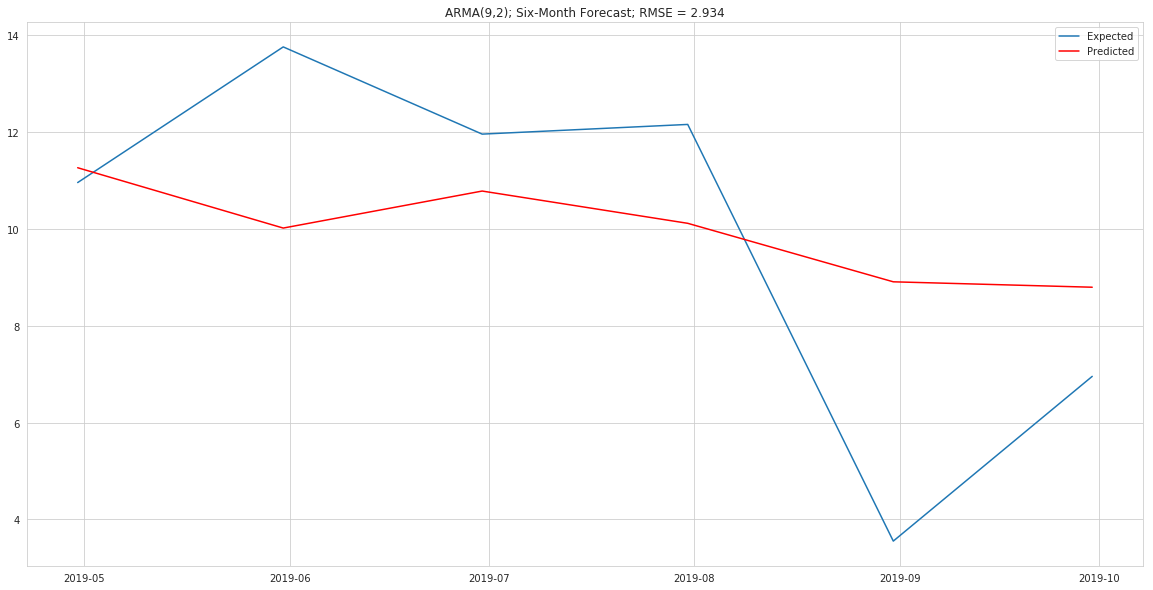

In [37]:
get_stats.Stats.ARMA_model(df_dm, maxp=10, maxq=2)

In [38]:
get_stats.Stats.ARMA_model(df_dm, maxp=10, maxq=3)

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

### Autoregressive Integrated Moving Average Model ( $ARIMA(p,d,q)$ )

In [ ]:
# residuals.plot(kind='kde')

In [ ]:
# autocorrelation_plot(residuals)